<a href="https://colab.research.google.com/github/rodrigo8502/projeto5/blob/main/bitcoin1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

!pip install pandas
!pip install scikit-learn





# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge


In [21]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/rodrigo8502/projeto5/refs/heads/main/Crypto%20Data%20Since%202015.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')



# Mostra as primeiras linhas do dataset
dataset.head()

,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL)
0,2015-01-01,1099.671415,102.760097,1199.071870,0.490443,19.915520,0.209481,0.045930,5.987009
1,2015-01-02,1135.844985,110.806193,1201.928708,0.526877,20.271863,0.222041,0.054818,5.687508
2,2015-01-03,1250.613839,116.286699,1201.829678,0.520009,19.974075,0.229863,0.049255,7.050012
3,2015-01-04,1452.916825,118.393314,1199.858272,0.563435,19.942816,0.243224,0.047298,7.903578
4,2015-01-05,1479.501487,128.322865,1200.014190,0.644235,20.201745,0.238137,0.044584,8.140522


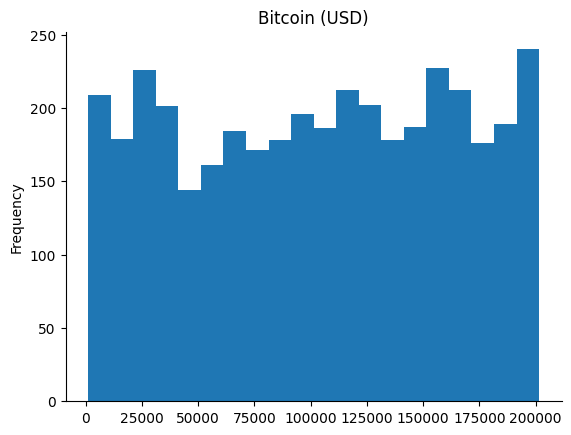

In [22]:
# @title Bitcoin (USD)

from matplotlib import pyplot as plt
dataset['Bitcoin (USD)'].plot(kind='hist', bins=20, title='Bitcoin (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

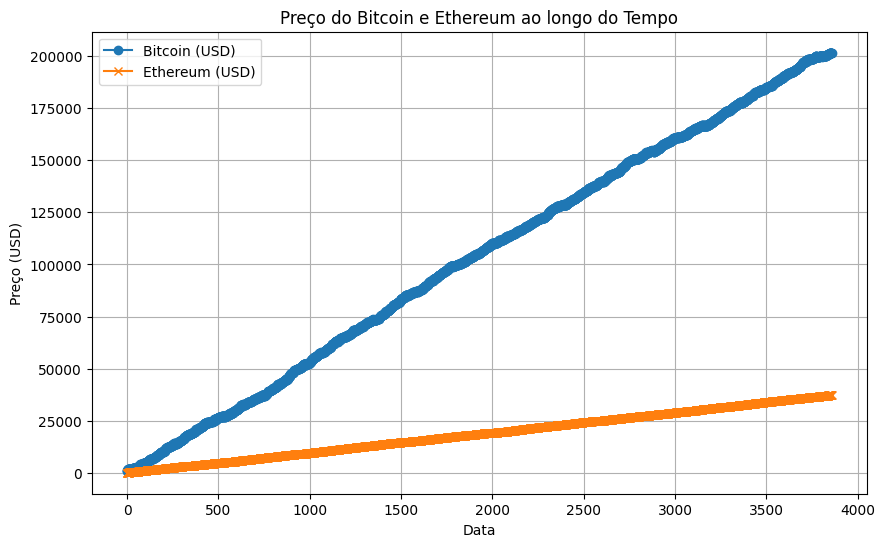

In [23]:
import matplotlib.pyplot as plt

# Criando um gráfico de linha para os preços
plt.figure(figsize=(10, 6))
plt.plot(dataset.index, dataset['Bitcoin (USD)'], label='Bitcoin (USD)', marker='o')
plt.plot(dataset.index, dataset['Ethereum (USD)'], label='Ethereum (USD)', marker='x')

plt.title('Preço do Bitcoin e Ethereum ao longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

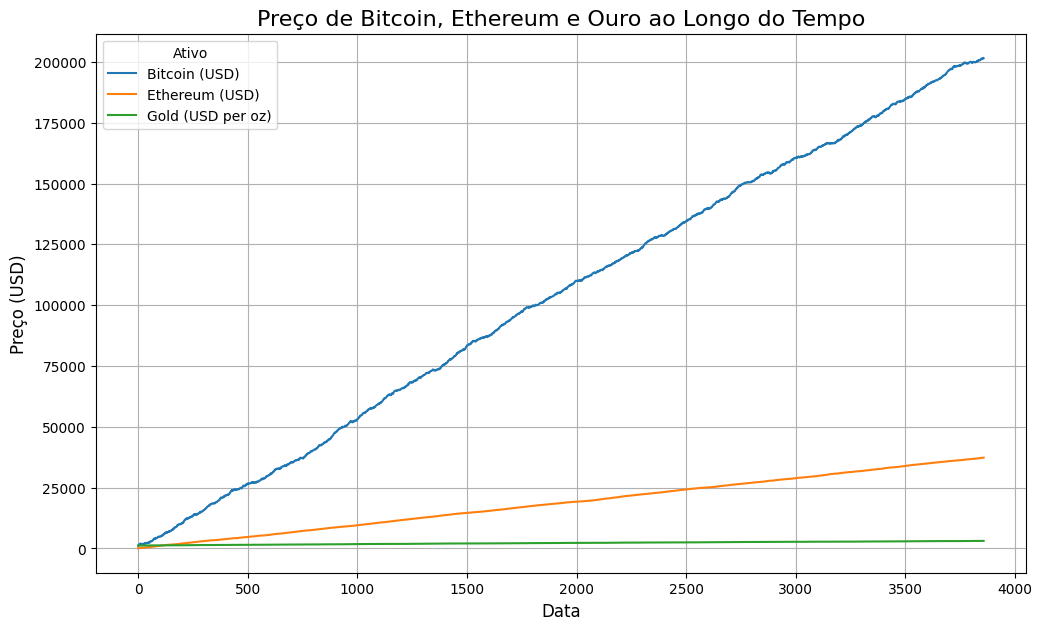

In [37]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=dataset[['Bitcoin (USD)', 'Ethereum (USD)', 'Gold (USD per oz)',]], dashes=False)
plt.title('Preço de Bitcoin, Ethereum e Ouro ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.legend(title='Ativo')
plt.grid(True)
plt.show()

In [24]:
# Calculando a variação diária percentual do Bitcoin
dataset['Bitcoin Daily Change (%)'] = dataset['Bitcoin (USD)'].pct_change() * 100

print("\nDataFrame com Novas Variáveis:\n")
print(dataset.head())


DataFrame com Novas Variáveis:

         Date  Bitcoin (USD)  Ethereum (USD)  Gold (USD per oz)  \
0  2015-01-01    1099.671415      102.760097        1199.071870   
1  2015-01-02    1135.844985      110.806193        1201.928708   
2  2015-01-03    1250.613839      116.286699        1201.829678   
3  2015-01-04    1452.916825      118.393314        1199.858272   
4  2015-01-05    1479.501487      128.322865        1200.014190   

   Cardano (ADA)  Binance Coin (BNB)  Ripple (XRP)  Dogecoin (DOGE)  \
0       0.490443           19.915520      0.209481         0.045930   
1       0.526877           20.271863      0.222041         0.054818   
2       0.520009           19.974075      0.229863         0.049255   
3       0.563435           19.942816      0.243224         0.047298   
4       0.644235           20.201745      0.238137         0.044584   

   Solana (SOL)  Bitcoin Daily Change (%)  
0      5.987009                       NaN  
1      5.687508                  3.289489  
2    

In [25]:
# Convertendo a coluna 'Date' para o tipo datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])
df = dataset.set_index('Date')

# Mostrando o resumo estatístico dos dados
print("Análise Descritiva:\n")
print(df.describe())

Análise Descritiva:

       Bitcoin (USD)  Ethereum (USD)  Gold (USD per oz)  Cardano (ADA)  \
count    3858.000000     3858.000000        3858.000000    3858.000000   
mean   103295.091119    18646.484019        2219.843587      41.150393   
std     59086.885281    10770.200525         540.896499      23.796932   
min      1099.671415      102.760097        1199.071870       0.490443   
25%     51775.591274     9183.157088        1766.802440      20.141836   
50%    105376.860438    18646.902925        2256.204837      40.974391   
75%    154587.897710    27888.634698        2697.102069      62.185396   
max    201506.238999    37333.366859        3119.461819      81.532909   

       Binance Coin (BNB)  Ripple (XRP)  Dogecoin (DOGE)  Solana (SOL)  \
count         3858.000000   3858.000000      3858.000000   3858.000000   
mean           623.130826     19.308745         3.931897    906.933311   
std            348.628727     10.848451         2.257275    532.415463   
min             

In [ ]:
dataset.tail() # Mostra as últimas cinco linhas do dataset

,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL)
3853,2025-07-20,201438.363511,37272.840934,3116.776780,81.404630,1217.227532,37.627797,7.958920,1865.252122
3854,2025-07-21,201451.812917,37280.367574,3119.264261,81.416877,1217.462496,37.646788,7.964835,1865.690363
3855,2025-07-22,201486.682995,37293.699880,3119.258087,81.496301,1218.207155,37.625843,7.966728,1866.233507
3856,2025-07-23,201397.104075,37316.691378,3118.918393,81.483584,1218.922214,37.636958,7.969450,1864.891748
3857,2025-07-24,201506.238999,37333.366859,3119.461819,81.532909,1219.517885,37.667654,7.971408,1866.601974


In [5]:
dataset.shape # Mostra o número de linhas e colunas

(3858, 9)

In [4]:
print(dataset.isnull().sum()) ## Verifica a quantidade de valores nulos em cada coluna


Date                  0
Bitcoin (USD)         0
Ethereum (USD)        0
Gold (USD per oz)     0
Cardano (ADA)         0
Binance Coin (BNB)    0
Ripple (XRP)          0
Dogecoin (DOGE)       0
Solana (SOL)          0
dtype: int64


In [ ]:
df_one_hot = pd.get_dummies(dataset, columns=['App'], prefix='App') # Aplicação do One-hot encoding na coluna app pois contém variáveis nominais sem uma ordem específica

In [ ]:
# Verificar os valores únicos na coluna 'Follows_Per_Day'
valores_unicos = dataset['Bitcoin (USD)'].value_counts()
print(valores_unicos)


Bitcoin (USD)
201506.238999    1
1099.671415      1
200713.674983    1
200734.653882    1
200746.086196    1
                ..
1714.009073      1
1506.087791      1
1479.501487      1
1452.916825      1
1250.613839      1
Name: count, Length: 3858, dtype: int64


In [15]:
# Estatísticas descritivas
print(dataset.describe())


                      Date  Bitcoin (USD)  Ethereum (USD)  Gold (USD per oz)  \
count                 3858    3858.000000     3858.000000        3858.000000   
mean   2020-04-12 12:00:00  103295.091119    18646.484019        2219.843587   
min    2015-01-01 00:00:00    1099.671415      102.760097        1199.071870   
25%    2017-08-22 06:00:00   51775.591274     9183.157088        1766.802440   
50%    2020-04-12 12:00:00  105376.860438    18646.902925        2256.204837   
75%    2022-12-02 18:00:00  154587.897710    27888.634698        2697.102069   
max    2025-07-24 00:00:00  201506.238999    37333.366859        3119.461819   
std                    NaN   59086.885281    10770.200525         540.896499   

       Cardano (ADA)  Binance Coin (BNB)  Ripple (XRP)  Dogecoin (DOGE)  \
count    3858.000000         3858.000000   3858.000000      3858.000000   
mean       41.150393          623.130826     19.308745         3.931897   
min         0.490443           19.915520      0.209481

In [26]:


# Calcular a correlação entre as colunas numéricas
correlation_matrix = dataset.corr()

print(correlation_matrix)


                              Date  Bitcoin (USD)  Ethereum (USD)  \
Date                      1.000000       0.999543        0.999956   
Bitcoin (USD)             0.999543       1.000000        0.999517   
Ethereum (USD)            0.999956       0.999517        1.000000   
Gold (USD per oz)         0.997860       0.998914        0.997746   
Cardano (ADA)             0.999770       0.999202        0.999718   
Binance Coin (BNB)        0.999848       0.999568        0.999754   
Ripple (XRP)              0.999571       0.999261        0.999431   
Dogecoin (DOGE)           0.998827       0.997289        0.998852   
Solana (SOL)              0.999411       0.998475        0.999469   
Bitcoin Daily Change (%) -0.196488      -0.197915       -0.195712   

                          Gold (USD per oz)  Cardano (ADA)  \
Date                               0.997860       0.999770   
Bitcoin (USD)                      0.998914       0.999202   
Ethereum (USD)                     0.997746       0.99

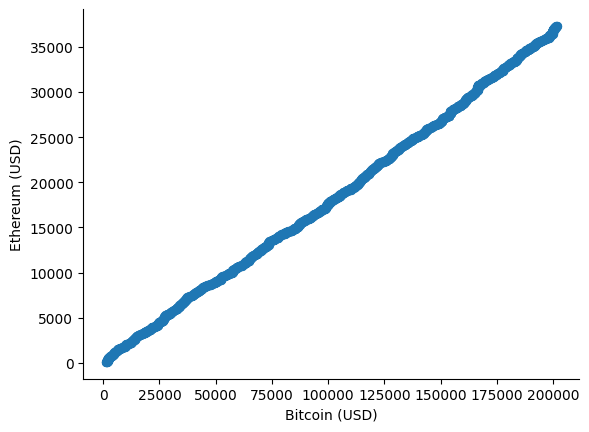

In [39]:
# @title Daily_Minutes_Spent vs Follows_Per_Day
## Gráfico de dispersão gerado com as colunas Daily_Minutes_Spent e Follows_Per_Day

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Bitcoin (USD)', y='Ethereum (USD)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,1:5]  # Pega as colunas 2 até 5
y = array[:, 5] # Seleciona a váriavel target 'Follows_Per_Day'
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação



# Parâmetros e partições da validação cruzada
scoring = 'neg_mean_squared_error'  # Para problemas de regressão, usamos 'neg_mean_squared_error'
num_particoes = 10  # Número de partições da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)  # Validação cruzada para regressão


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Criando o OneHotEncoder com sparse=False
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# Aplicando a transformação
encoded_columns = encoder.fit_transform(dataset[["App"]])

# Verificando o tipo de dados após a codificação
print(encoded_columns.dtype)  # Isso será 'float64' ou 'int64'

float64


In [ ]:
# Transformando o resultado para um DataFrame e adicionando as colunas codificadas ao DataFrame original
# Converting the sparse matrix to a dense one if needed



encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(["App"]))

# Concatenando com as colunas numéricas
X_encoded = pd.concat([encoded_df, dataset.drop(columns=["User_ID", "App", "Follows_Per_Day"])], axis=1)

# Separando a variável dependente (target)
y = dataset["Follows_Per_Day"]

In [40]:
print(X_encoded.isnull().sum())

NameError: name 'X_encoded' is not defined

In [ ]:
# Verifique os tipos de dados de X e y
print(y_train.dtype)  # Tipos de dados de X

float64


In [ ]:
y_train = np.array(y_train, dtype=np.float64)  # Para valores contínuos (reais)

In [ ]:
# Converter X e y para float
X = X.astype(float)
y = y.astype(float)

In [ ]:
# Verificar os tipos de dados de X e y
print("Tipos de dados de X:", X.dtype)
print("Tipos de dados de y:", y.dtype)

Tipos de dados de X: float64
Tipos de dados de y: float64


In [41]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_regression, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X_train, y_train)

# Reduz X para os atributos selecionados
features = fit.transform(X_train)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[1:5])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
# Exibe os atributos selecionados com base nos índices
selected_indices = fit.get_support(indices=True)  # Obtém os índices dos atributos selecionados
selected_features = X_train.columns[selected_indices]  # Obtém os nomes das colunas selecionadas

print("\nAtributos Selecionados:", selected_features)

NameError: name 'X_train' is not defined

LR: -224.412627 (25.282939)
KNN: -272.486100 (37.029036)
CART: -443.881250 (42.710755)
SVR: -223.565944 (26.143309)
Bagging: -258.239315 (24.071591)
RF: -253.625046 (27.326782)
ET: -265.456951 (29.826692)
Ada: -223.834321 (24.779892)
GB: -238.616002 (28.485648)
Voting: -283.195790 (23.796264)


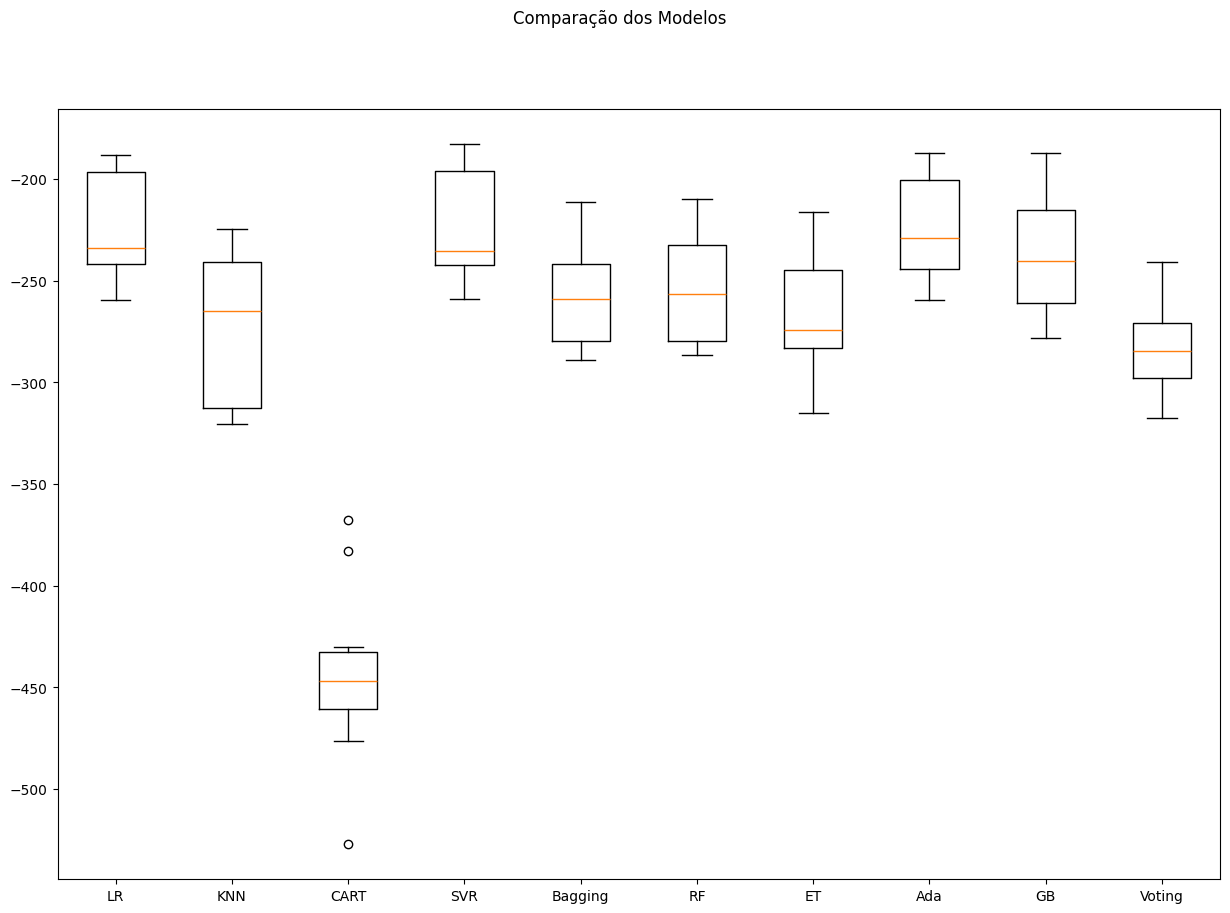

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Definindo os parâmetros do classificador base para o BaggingRegressor
base = DecisionTreeRegressor()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []

model2 = DecisionTreeRegressor()
bases.append(('cart', model2))
model3 = SVR()
bases.append(('svr', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingRegressor(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostRegressor(n_estimators=num_trees)))
models.append(('GB', GradientBoostingRegressor(n_estimators=num_trees)))
models.append(('Voting', VotingRegressor(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

KNN-orig: -272.486 (37.029)
LR-orig: -224.413 (25.283)
SVR-orig: -223.566 (26.143)
RF-orig: -249.441 (23.391)
ET-orig: -265.886 (28.208)
Ada-orig: -222.006 (22.666)
GB-orig: -238.415 (28.911)
Vot-orig: -282.075 (26.648)
KNN-padr: -263.487 (38.628)
LR-padr: -224.413 (25.283)
SVR-padr: -225.599 (23.808)
RF-padr: -248.515 (25.843)
ET-padr: -262.151 (29.489)
Ada-padr: -225.589 (23.983)
GB-padr: -239.276 (28.513)
Vot-padr: -278.696 (24.237)
KNN-norm: -262.405 (39.942)
LR-norm: -224.413 (25.283)
SVR-norm: -224.796 (23.584)
RF-norm: -248.367 (27.850)
ET-norm: -263.943 (26.736)
Ada-norm: -222.142 (23.606)
GB-norm: -239.132 (28.183)
Vot-norm: -278.568 (28.501)


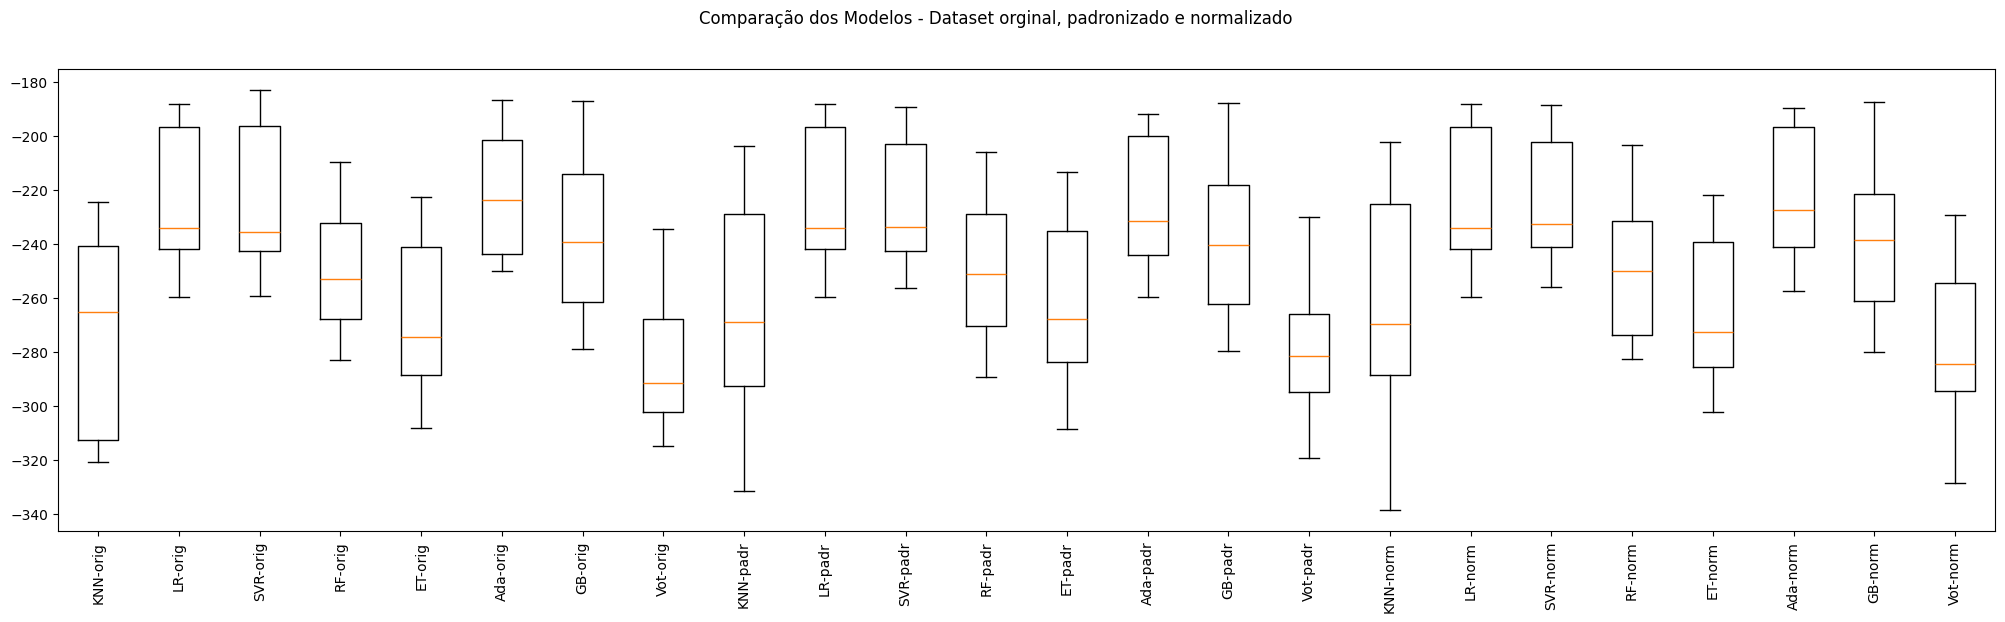

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados

LR = ('LR', LinearRegression())
SVR = ('SVR', SVR())
knn = ('KNN', KNeighborsRegressor())
random_forest = ('RF', RandomForestRegressor(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostRegressor(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingRegressor(n_estimators=num_trees))
voting = ('Voting', VotingRegressor(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original

pipelines.append(('KNN-orig', Pipeline([knn])))

pipelines.append(('LR-orig', Pipeline([LR])))
pipelines.append(('SVR-orig', Pipeline([SVR])))

pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado

pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('LR-padr', Pipeline([standard_scaler, LR])))

pipelines.append(('SVR-padr', Pipeline([standard_scaler, SVR])))

pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado

pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('LR-norm', Pipeline([min_max_scaler, LR])))

pipelines.append(('SVR-norm', Pipeline([min_max_scaler, SVR])))

pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [ ]:
# Tuning do AdaBoostRegressor

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
ada_boost = ('AdaBoost', AdaBoostRegressor())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('ada-orig', Pipeline(steps=[ada_boost])))
pipelines.append(('ada-padr', Pipeline(steps=[standard_scaler, ada_boost])))
pipelines.append(('ada-norm', Pipeline(steps=[min_max_scaler, ada_boost])))

param_grid = {
    'AdaBoost__n_estimators': [50, 100, 200],  # Número de estimadores (árvores)
    'AdaBoost__learning_rate': [0.01, 1, 1]  # Taxa de aprendizado
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: ada-orig - Melhor: -221.444808 usando {'AdaBoost__learning_rate': 1, 'AdaBoost__n_estimators': 100}
Sem tratamento de missings: ada-padr - Melhor: -221.993063 usando {'AdaBoost__learning_rate': 0.01, 'AdaBoost__n_estimators': 200}
Sem tratamento de missings: ada-norm - Melhor: -221.863273 usando {'AdaBoost__learning_rate': 0.01, 'AdaBoost__n_estimators': 50}


In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = AdaBoostRegressor()
model.fit(rescaledX, y_train)

# Estimativa do erro quadrático médio no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions))

228.55358123909696


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X_train) # ajuste do scaler com TODO o dataset
rescaledX_train = scaler.transform(X_train) # aplicação da padronização com TODO o dataset
model.fit(rescaledX_train, y_train)

AdaBoostRegressor()

In [ ]:
# Novos dados - não sabemos a classe!
data = {'App':  ['Instagram', 'Tiktok', 'Facebook'],
        'Daily_Minutes_Spent':  [250, 15, 20],
        'Post_Per_Day': [150, 9, 25],
        'Likes_Per_Day': [120, 60, 15]

          }

atributos = ['App', 'Daily_Minutes_Spent', 'Post_Per_Day', 'Likes_Per_Day', ]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = X_encoded.values
X_entrada = array_entrada[:,0:4].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(array_entrada)
print(rescaledEntradaX)

[[-0.41  -0.408  2.491 ...  0.257  0.942 -0.017]
 [-0.41  -0.408 -0.401 ... -0.396  0.613  0.383]
 [ 2.441 -0.408 -0.401 ...  0.686  0.449  0.435]
 ...
 [-0.41  -0.408 -0.401 ...  0.461 -0.703  0.174]
 [-0.41  -0.408 -0.401 ...  0.373  0.778  0.973]
 [-0.41  -0.408  2.491 ... -0.921  1.107 -0.243]]


In [ ]:
# Criando um modelo com todo o conjunto de treino
model = AdaBoostRegressor()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)


# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))



MSE 240.62
RMSE 15.51
